In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [ ]:
df1= pd.read_csv('EvScooter India 6.csv')

df1.describe()



,Price (in lakhs),Range,Top_speed,Battery_capacity
count,48.000000,48.000000,37.000000,45.000000
mean,0.766458,93.781250,53.189189,2.108133
std,0.311588,46.945975,27.963108,1.001241
min,0.250000,0.000000,18.000000,0.576000
25%,0.540000,62.500000,25.000000,1.440000
50%,0.710000,90.000000,46.000000,1.860000
75%,0.990000,110.000000,72.000000,3.000000
max,1.600000,300.000000,116.000000,4.800000


In [ ]:
df1.isnull().sum()

Model                0
Price (in lakhs)     0
Range                0
Charging_time       42
Top_speed           11
Motor_type          11
Battery_type         5
Battery_capacity     3
Wheels_type          1
Tyre_type            3
dtype: int64

In [ ]:
df1 = df1.replace(to_replace="Lithium ion",
           value="Lithium Ion")
df1 = df1.replace(to_replace="Lithium-ion",
           value="Lithium Ion")
df1 = df1.replace(to_replace="Lithium-Ion",
           value="Lithium Ion")

df1 = df1.replace(to_replace="Aluminium Alloy",
           value="Aluminium")
df1 = df1.replace(to_replace="ALLOY",
           value="Alloy	")
df1 = df1.replace(to_replace="Alloy Wheels",
           value="Alloy	")


df1

,Model,Price (in lakhs),Range,Charging_time,Top_speed,Motor_type,Battery_type,Battery_capacity,Wheels_type,Tyre_type
0,Ola S1,0.99,128.0,NaN,95.0,Mid Drive IPM,NaN,3.000,Aluminium,Tubeless
1,TVS iQube Electric,1.60,100.0,2 Hour 50 Min - 80%,78.0,BLDC,Lithium Ion,3.000,Alloy,Tubeless
2,Ather 450X,0.98,146.0,5 hours 40 minutes,90.0,PMSM,Lithium Ion,3.700,Alloy,Tubeless
3,Bajaj Chetak,1.22,90.0,4 Hours,63.0,BLDC,Lithium Ion,3.000,Alloy,Tubeless
4,Ola S1 Pro,1.23,181.0,NaN,116.0,Mid Drive IPM,NaN,3.000,Aluminium,Tubeless
5,Simple One,1.09,300.0,NaN,105.0,NaN,Lithium Ion,4.800,Alloy,Tubeless
6,Vida V1,1.28,165.0,65 minutes ( 0-80 ),80.0,PMSM,NaN,3.940,Alloy,Tubeless
7,Hero Electric Optima,0.67,140.0,NaN,45.0,NaN,NaN,1.530,Alloy,NaN
8,Ampere Magnus EX,0.83,121.0,NaN,50.0,BLDC,Lithium Ion,2.280,Alloy,NaN
9,Bounce Infinity E1,0.64,85.0,NaN,65.0,BLDC,Lithium Ion,1.900,Alloy,Tubeless


In [ ]:
df1.describe()


,Price (in lakhs),Range,Top_speed,Battery_capacity
count,48.000000,48.000000,37.000000,45.000000
mean,0.766458,93.781250,53.189189,2.108133
std,0.311588,46.945975,27.963108,1.001241
min,0.250000,0.000000,18.000000,0.576000
25%,0.540000,62.500000,25.000000,1.440000
50%,0.710000,90.000000,46.000000,1.860000
75%,0.990000,110.000000,72.000000,3.000000
max,1.600000,300.000000,116.000000,4.800000


At this point we have cleaned the 2 wheeler ev data set. This is a set of interest as scooters are much more cost affective and bike taxis are proving to be more and more popular as of late and is an alternative segment with a lower barrier of entry worth considering. 

<Figure size 2000x600 with 0 Axes>

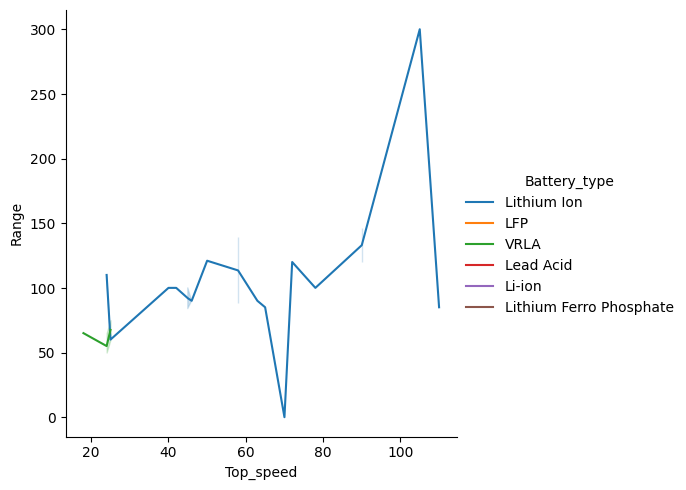

In [ ]:
plt.figure(figsize=(20, 6))
sns.relplot(data=df1, x="Top_speed", y="Range", kind="line", hue="Battery_type")


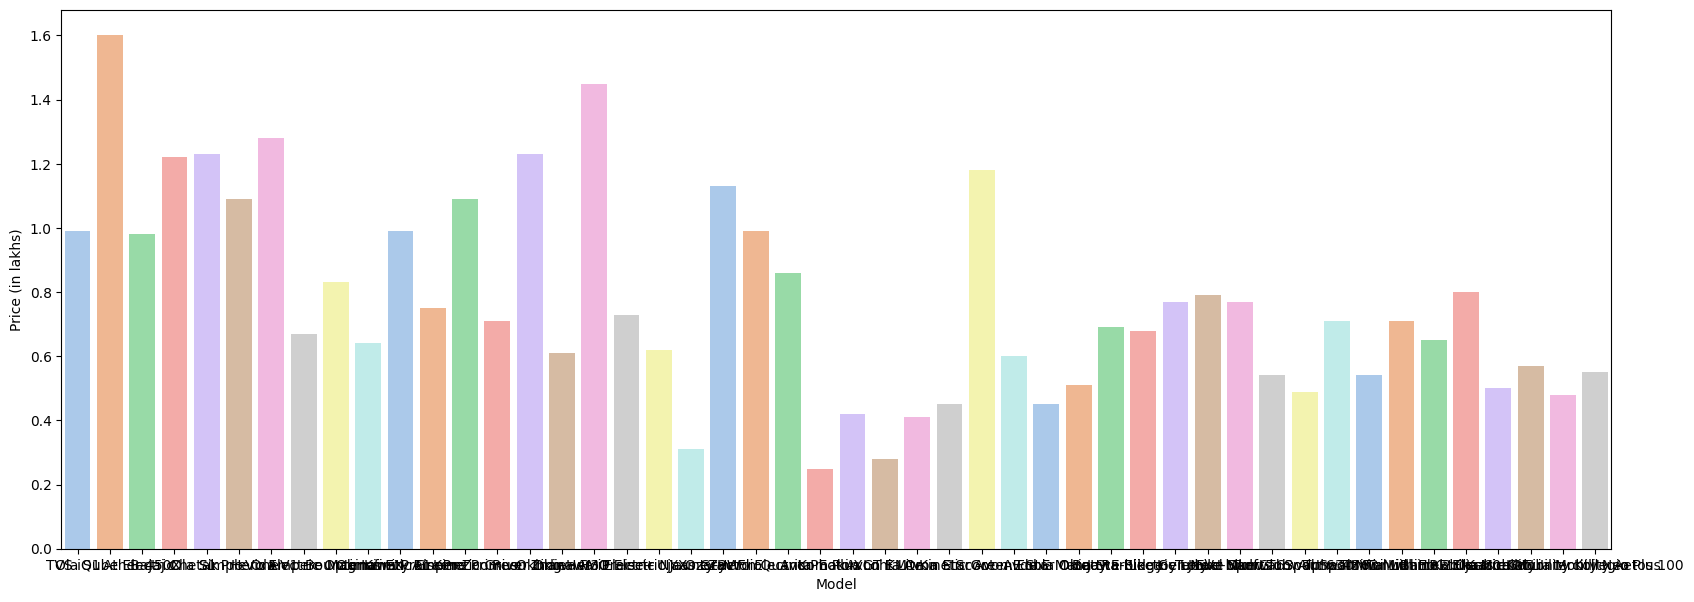

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(data=df1, y=df1['Price (in lakhs)'], x = df1['Model'], palette='pastel')

plt.show()

2 wheelers with a relatively high range have lower top speed. 
lithium ion batteries tend to have more range

In [ ]:
df2 = pd.read_csv('buying_auto_study final.csv')
df2.head(50)

<ipython-input-28-5892473beecd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df2.corr()


<Axes: >

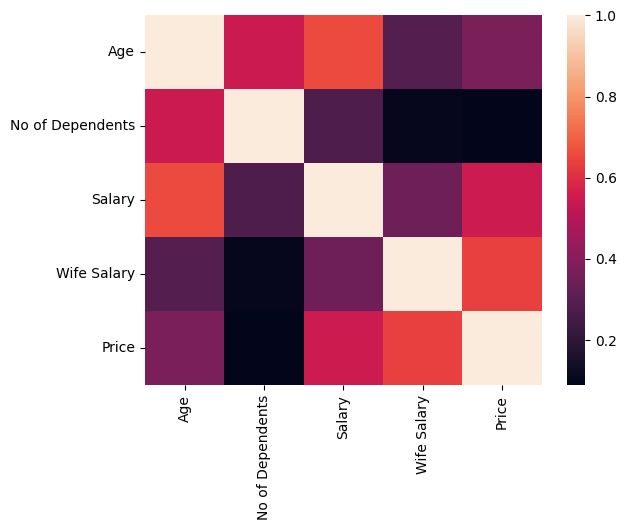

In [ ]:
correlation= df2.corr()
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

there is a 0.7 correlation between total salary and price of car. 

Mean salary: 	22,70,707

Mean price of car: 11,94,040



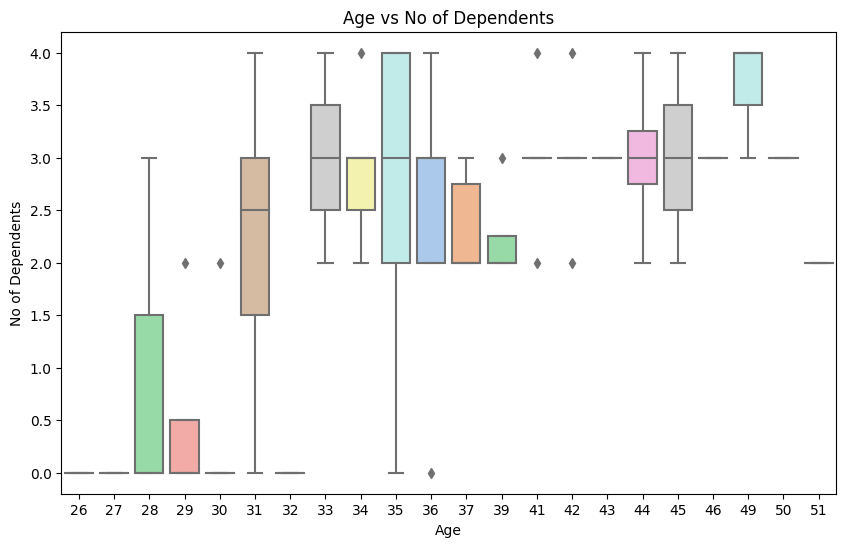

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Age', y='No of Dependents', palette='pastel')
plt.title('Age vs No of Dependents')
plt.xlabel('Age')
plt.ylabel('No of Dependents')
plt.show()

<Figure size 2000x600 with 0 Axes>

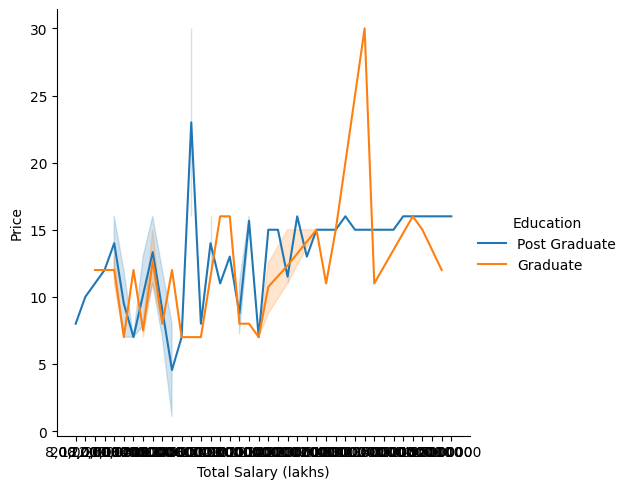

In [ ]:
plt.figure(figsize=(20, 6))
sns.relplot(data=df2, x="Total Salary (lakhs)", y="Price", kind="line", hue="Education")

In [ ]:
df3 = pd.read_csv('4WheelEVIndia final 2.csv')

df3.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312,Automatic,Electric,14,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306,Automatic,Electric,13,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437,Automatic,Electric,18,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419,Automatic,Electric,23,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452,Automatic,Electric,24,5 Seater,na,Premium Dual Tone,HSE


<Figure size 2000x800 with 0 Axes>

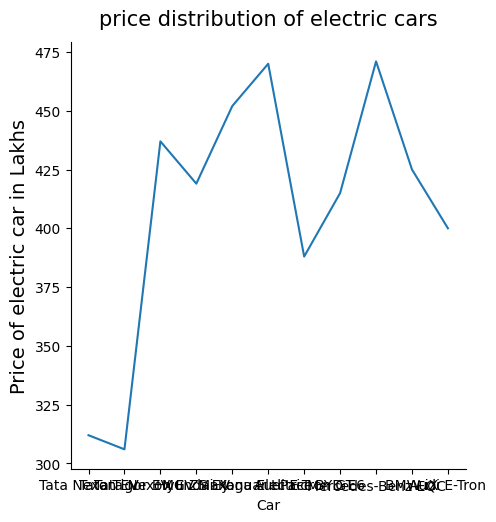

In [ ]:
plt.figure(figsize=(20, 8))
sns.relplot(data=df3, x = df3['Car'] , y=df3['Range'], kind = 'line')
plt.ylabel('Price of electric car in Lakhs', fontsize=14)
plt.title(label='price distribution of electric cars', weight=200, size=15, pad=12)
plt.show()

<Figure size 2000x800 with 0 Axes>

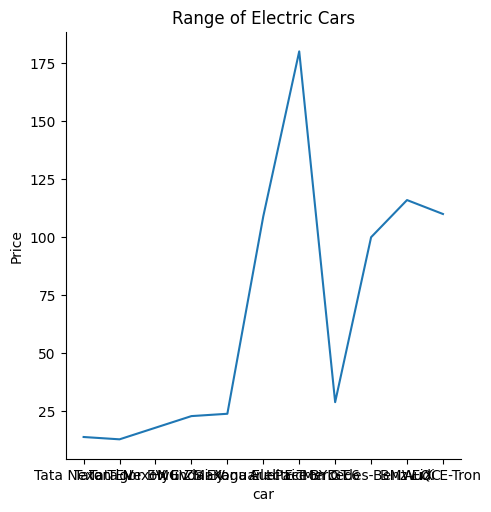

In [ ]:
plt.figure(figsize=(20, 8))
sns.relplot(data=df3, x='Car', y='PriceRange', kind = 'line', )
plt.title('Range of Electric Cars')
plt.xlabel('car')
plt.ylabel('Price')
plt.show()

We observe that electric vehicles in India currently are quite expensive and rarely affordable to the common person. Starting at 13L. families that tend to buy cars rarely spend this kind of money.

In [ ]:
df4 = pd.read_csv('Statewise data final.csv')
df4.head()



,Sr. No.,State,Total Electric Vehicle,Total Non-Electric Vehicle,Total no of vehicles,Charging Stations,No of charging station sanctioned,Retail outlets charging stations,Total Males under 2011 census,Total girls under 2011 census,Total working male,Total working Female,EV Annual sales in 2022
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107",0.0,10,0,202871.0,177710.0,120889.0,31646.0,NaN
1,2,Arunachal Pradesh,20,"2,52,965","2,52,985",0.0,0,4,713912.0,669815.0,350273.0,237384.0,NaN
2,3,Assam,64766,"46,77,053","47,41,819",0.0,0,19,15939443.0,15266133.0,8541560.0,3428130.0,4.48%
3,4,Bihar,83335,"1,04,07,078","1,04,90,413",0.0,37,26,54278157.0,49821295.0,25222189.0,9502798.0,6.20%
4,5,Chandigarh,2812,"7,46,881","7,49,693",48.0,70,4,580663.0,474787.0,328159.0,75977.0,NaN


In [ ]:
df4['Total_expected'] = df4['Charging Stations'] + df4['No of charging station sanctioned'] + df4['Retail outlets charging stations']

In [ ]:
df4['Total_expected']

0      10.0
1       4.0
2      19.0
3      63.0
4     122.0
5      76.0
6     232.0
7      47.0
8     365.0
9     164.0
10     32.0
11     28.0
12     52.0
13    337.0
14    250.0
15      2.0
16    405.0
17      1.0
18     43.0
19      0.0
20      2.0
21     44.0
22     12.0
23     41.0
24    428.0
25     29.0
26    357.0
27      3.0
28      0.0
29    217.0
30    154.0
31    212.0
32      NaN
33      NaN
34      NaN
Name: Total_expected, dtype: float64

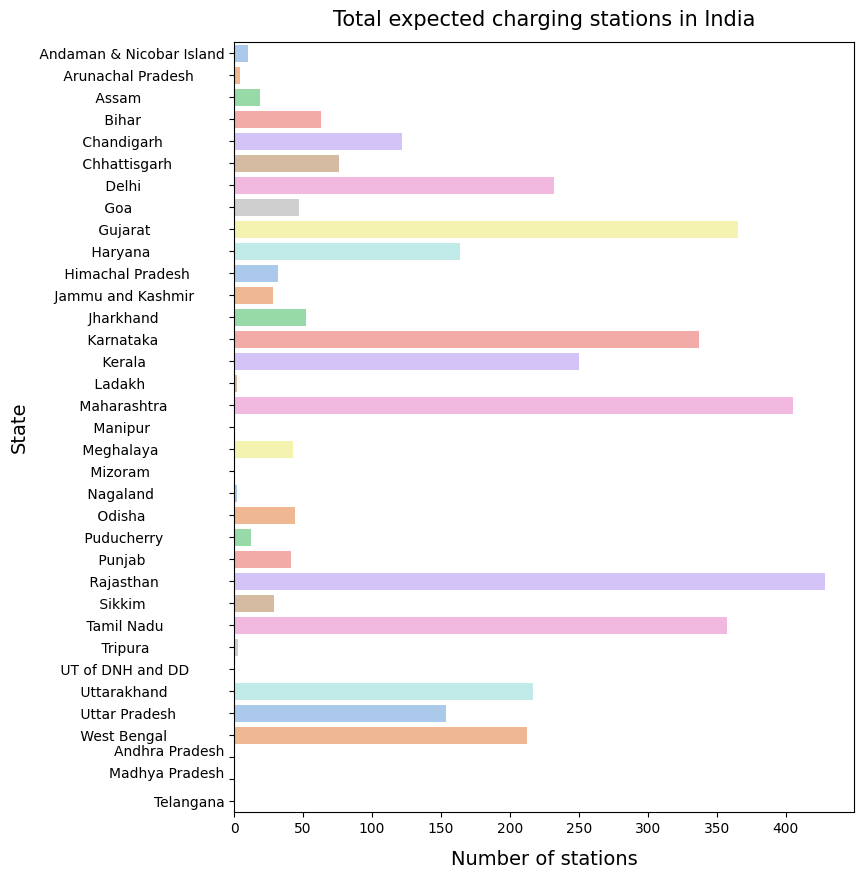

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(data=df4, y=df4['State'], x=df4['Total_expected'], palette='pastel')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of stations', fontsize=14, labelpad=10)
plt.title(label='Total expected charging stations in India', weight=200, size=15, pad=12)
plt.show()


<ipython-input-20-851726ed8c52>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df4, y=df4['State'], x= df4['Total Electric Vehicle'], palette='pastel')


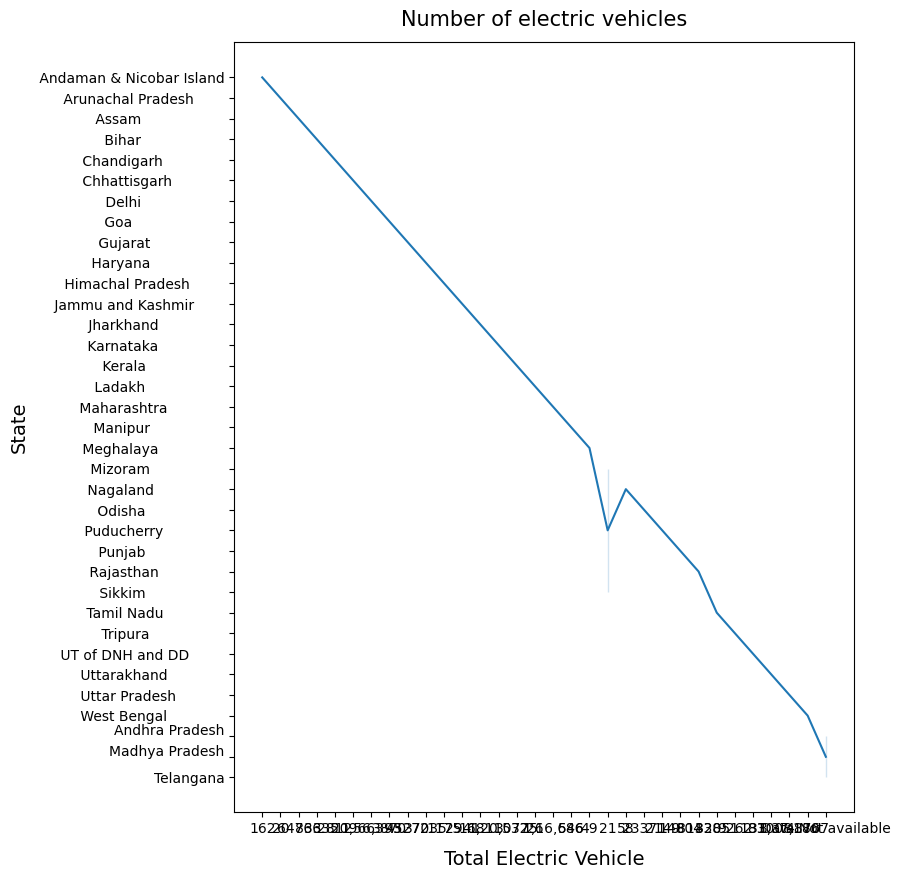

In [ ]:
plt.figure(figsize=(8, 10))
sns.lineplot(data=df4, y=df4['State'], x= df4['Total Electric Vehicle'], palette='pastel')
plt.ylabel('State', fontsize=14)
plt.xlabel('Total Electric Vehicle', fontsize=14, labelpad=10)
plt.title(label='Number of electric vehicles', weight=200, size=15, pad=12)
plt.show()

In [ ]:

test = df1.drop(labels='Model',axis=1)
test = test.drop(labels='Charging_time',axis=1)
test = test.drop(labels='Top_speed',axis=1)
test = test.drop(labels='Tyre_type',axis=1)
test = test.drop(labels='Wheels_type',axis=1)



In [ ]:
le = LabelEncoder()
test['Motor_type'] = le.fit_transform(test['Motor_type'])
test['Battery_type'] = le.fit_transform(test['Battery_type'])
test['Battery_capacity'] = le.fit_transform(test['Battery_capacity'])
test['Range'] = le.fit_transform(test['Range'])
test['Price (in lakhs)'] = le.fit_transform(test['Price (in lakhs)'])
test = test.dropna()

test.head()

,Price (in lakhs),Range,Motor_type,Battery_type,Battery_capacity
0,30,17,2,6,16
1,37,12,0,4,16
2,29,20,4,4,19
3,34,10,0,4,16
4,35,22,2,6,16


In [ ]:
stscaler = StandardScaler()
test_scaled = stscaler.fit_transform(test)

In [ ]:
pca = PCA(0.95)
test_pca = pca.fit_transform(test_scaled)

In [ ]:
df_pca = pd.DataFrame(test_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.706595,-1.589447,0.342545,0.055246,-0.178660
1,1.170936,-0.374488,-1.290675,0.700417,-0.128250
2,2.354978,0.234508,0.202870,-0.638532,-0.072518
3,0.872046,-0.299777,-1.135933,0.785689,0.075835
4,2.334516,-1.772122,0.038157,-0.287002,-0.572934


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

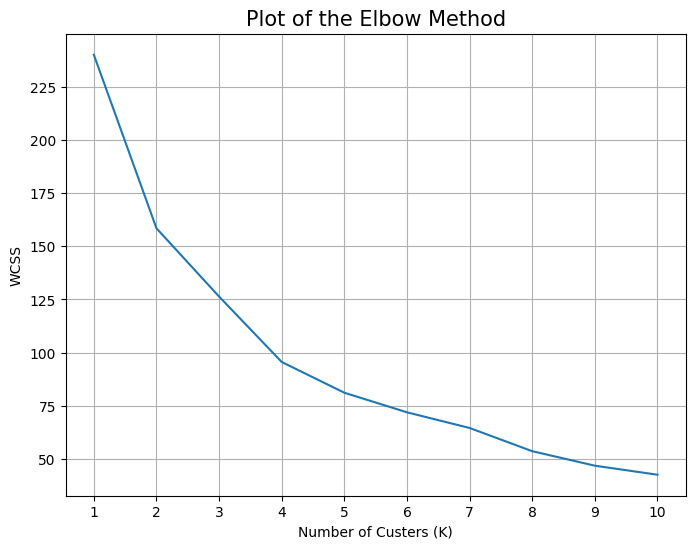

In [ ]:
wcss = []
for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(test_pca)
  wcss.append(kmean.inertia_)
plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.yticks()
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-MEANS

In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:

pd.Series(kmean.labels_).value_counts()

1    21
2    12
3    11
0     4
dtype: int64

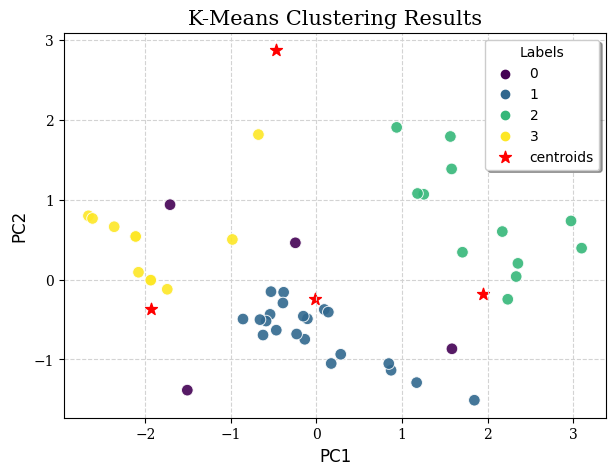

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', size=12)
plt.ylabel('PC2', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()